# Task 2: Quantitative Analysis Using TA-Lib, pandas_ta, and PyNance

In [37]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from pathlib import Path
import pickle

In [38]:
# Create necessary directories
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"
PLOTS_DIR = BASE_DIR / "plots"

In [39]:
# Create directories if they don't exist
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

In [40]:
def save_and_show_plot(filename):
    """Helper function to save plots and display them"""
    plt.tight_layout()
    
    # Save plot to file
    plt.savefig(PLOTS_DIR / filename)
    print(f"Saved plot: {filename}")
    
    # Display plot
    plt.show()

In [41]:
# Pickle save helper
def save_pickle(obj, filename):
    path = DATA_DIR / filename
    with open(path, 'wb') as f:
        pickle.dump(obj, f)
    print(f"Saved data: {filename}")

In [42]:
# Load all stock price CSVs
csv_folder = r"C:\Users\jilow\OneDrive\Documents\FIndata\yfinance_data"
csv_files = glob.glob(os.path.join(csv_folder, "*_historical_data.csv"))

In [71]:
# Dictionary to hold DataFrames
dfs = {}
for file in csv_files:
    ticker = os.path.basename(file).split("_")[0]
    df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    df.columns = df.columns.str.lower()  # ✅ Ensure all column names are lowercase
    dfs[ticker] = df

print("Loaded tickers:", list(dfs.keys()))


Loaded tickers: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']


In [72]:
for ticker, df in dfs.items():
    try:
        # Use lowercase column names
        df['sma20'] = talib.SMA(df['close'], timeperiod=20)
        df['rsi14'] = talib.RSI(df['close'], timeperiod=14)
        macd, signal, hist = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
        df['macd'] = macd
        df['macd_signal'] = signal
        df['macd_hist'] = hist

        # Volatility (choose one method)
        df['volatility20'] = df['close'].rolling(window=20).std()
        # OR: df['volatility20'] = pta.stdev(df['close'], length=20)

        # Returns
        df['daily_return'] = df['close'].pct_change()

        # Additional metrics
        df['ema50'] = talib.EMA(df['close'], timeperiod=50)
        df['atr14'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=14)

        # Save results
        df.to_csv(DATA_DIR / f"{ticker}_technical_analysis.csv", index=False)
        save_pickle(df, f"{ticker}_technical_analysis.pkl")

        print(f"Processed indicators for {ticker}")

    except Exception as e:
        print(f"Error processing {ticker}: {str(e)}")


Saved data: AAPL_technical_analysis.pkl
Processed indicators for AAPL
Saved data: AMZN_technical_analysis.pkl
Processed indicators for AMZN
Saved data: GOOG_technical_analysis.pkl
Processed indicators for GOOG
Saved data: META_technical_analysis.pkl
Processed indicators for META
Saved data: MSFT_technical_analysis.pkl
Processed indicators for MSFT
Saved data: NVDA_technical_analysis.pkl
Processed indicators for NVDA
Saved data: TSLA_technical_analysis.pkl
Processed indicators for TSLA


In [75]:
# Select a sample ticker (or small subset) for Task 3
sample_ticker = 'AAPL' if 'AAPL' in dfs else list(dfs.keys())[0]

df_sample = dfs[sample_ticker].copy()

if 'Date' in df_sample.columns:
    df_sample['date'] = pd.to_datetime(df_sample['Date'])
elif 'date' in df_sample.columns:
    df_sample['date'] = pd.to_datetime(df_sample['date'])
else:
    df_sample = df_sample.reset_index()
    df_sample.columns = df_sample.columns.str.lower()
    df_sample['date'] = pd.to_datetime(df_sample['date'])

In [76]:
# Save sample dataset for Task 3
sample_csv_path = DATA_DIR / f'{sample_ticker}_with_indicators.csv'
sample_pkl_path = DATA_DIR / f'{sample_ticker}_with_indicators.pkl'
df_sample.to_csv(sample_csv_path, index=False)
save_pickle(df_sample, f'{sample_ticker}_with_indicators.pkl')
print(f"Saved sample ticker {sample_ticker} dataset for Task 3 to {sample_csv_path}")

Saved data: AAPL_with_indicators.pkl
Saved sample ticker AAPL dataset for Task 3 to c:\Users\jilow\OneDrive\Documents\10academy-week1\data\AAPL_with_indicators.csv


### Visualizations

Saved plot: AAPL_sma20_plot.png


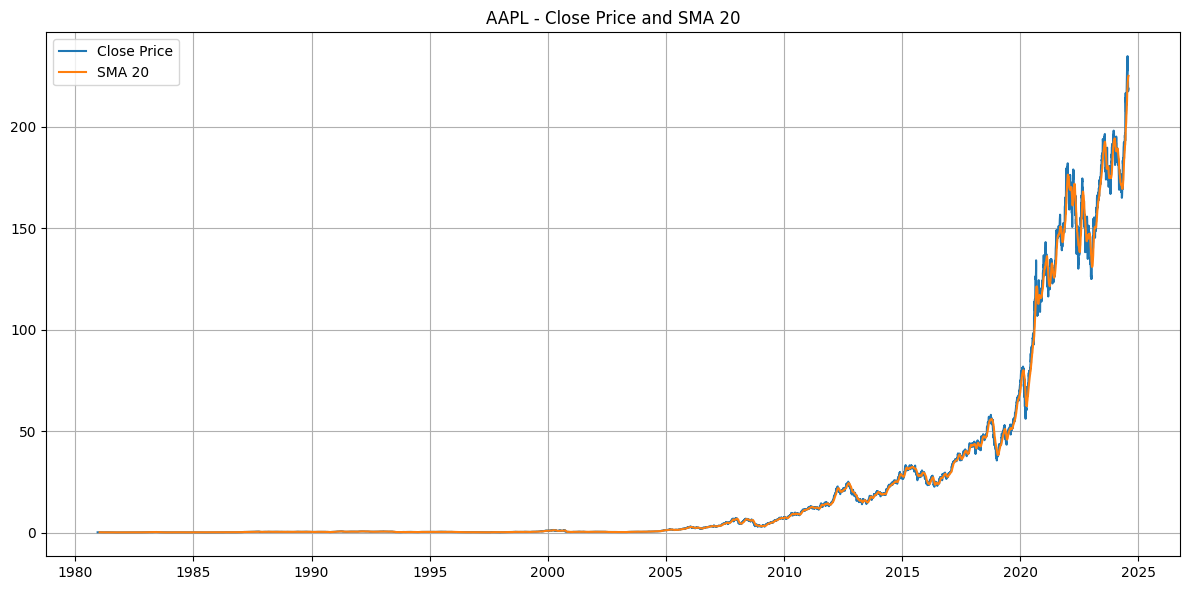

In [77]:
# Step 4: Visualize indicators for the sample ticker
plt.figure(figsize=(12, 6))
plt.plot(df_sample['date'], df_sample['close'], label='Close Price')
plt.plot(df_sample['date'], df_sample['sma20'], label='SMA 20')
plt.title(f"{sample_ticker} - Close Price and SMA 20")
plt.legend()
plt.grid(True)
save_and_show_plot(f'{sample_ticker}_sma20_plot.png')

Saved plot: AAPL_price_sma20.png


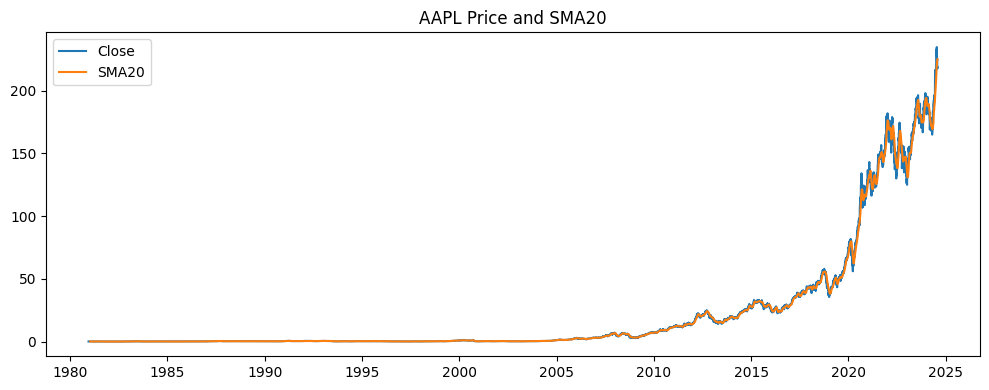

Saved plot: AMZN_price_sma20.png


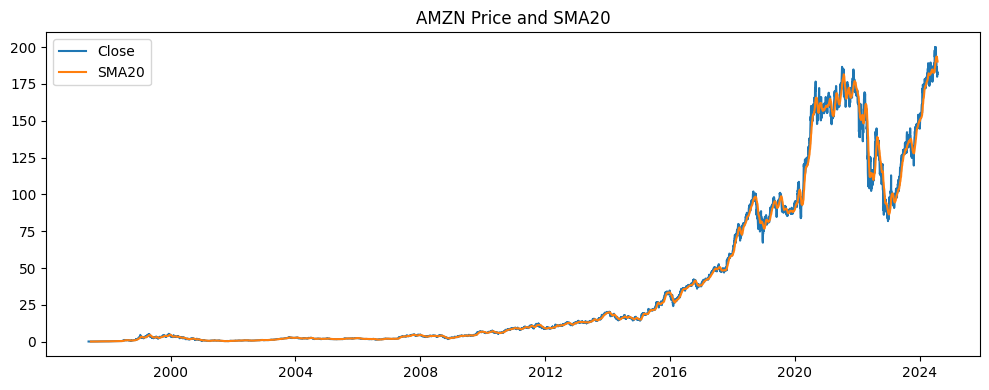

Saved plot: GOOG_price_sma20.png


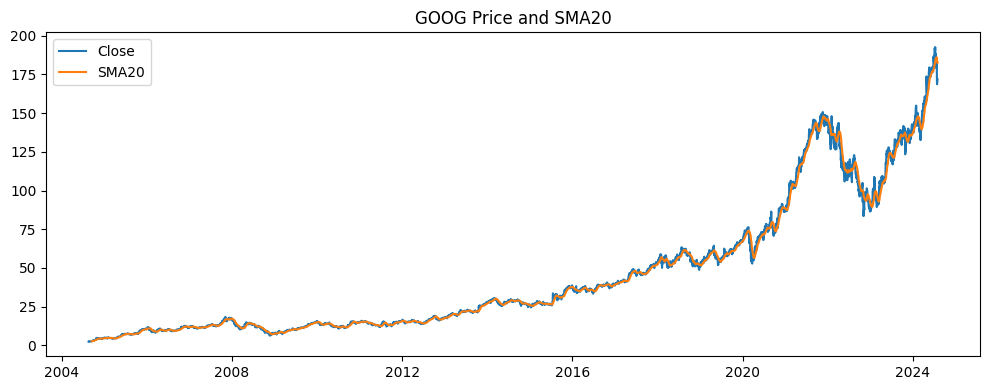

Saved plot: META_price_sma20.png


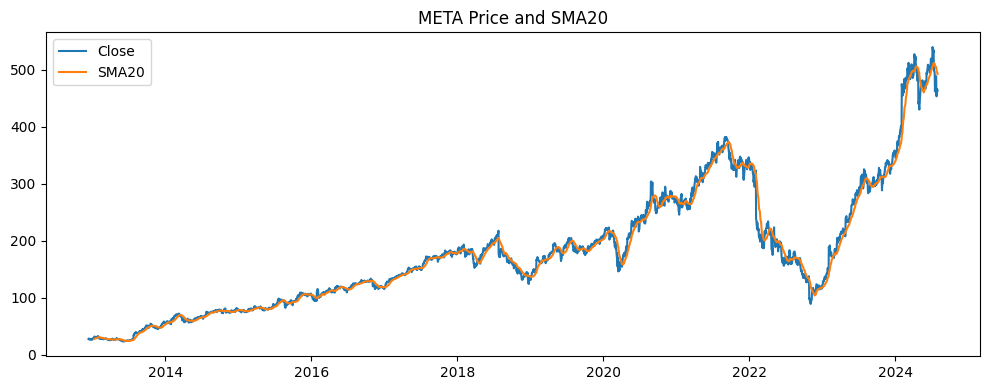

Saved plot: MSFT_price_sma20.png


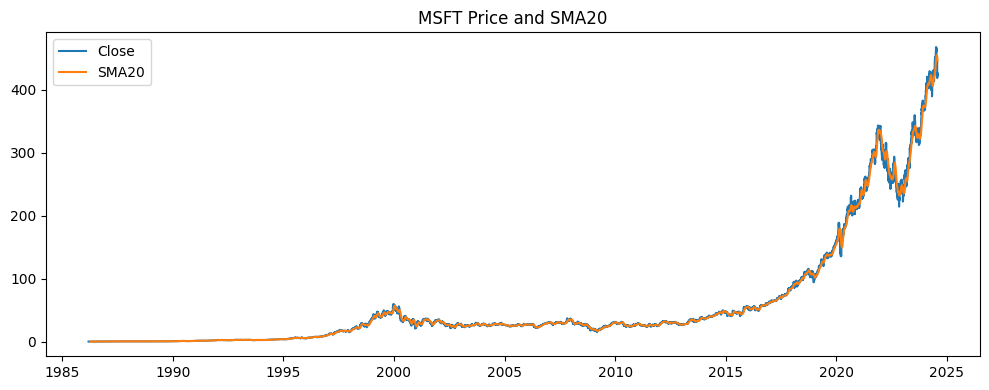

Saved plot: NVDA_price_sma20.png


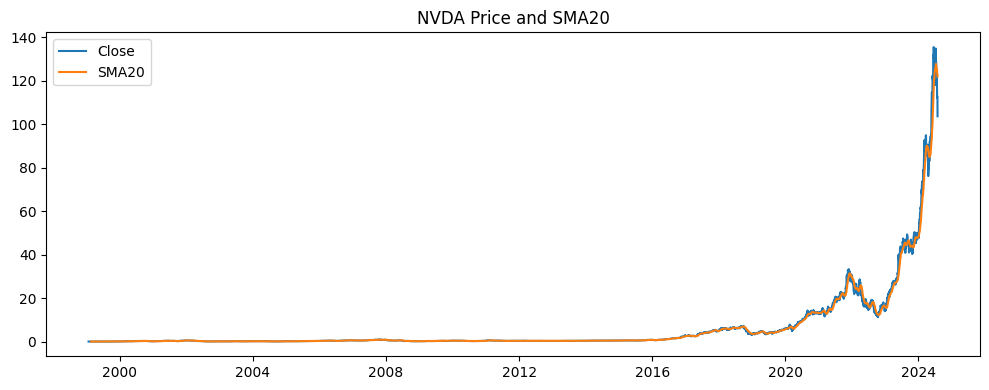

Saved plot: TSLA_price_sma20.png


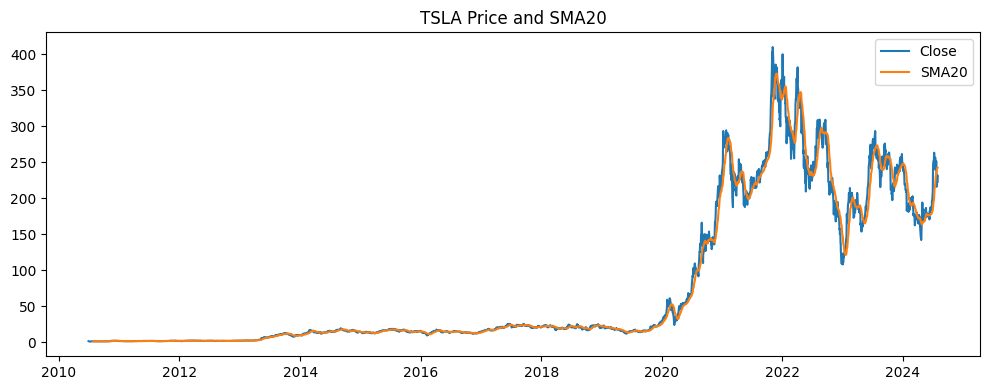

In [79]:
for ticker, df in dfs.items():
    # Plot Close + SMA20
    plt.figure(figsize=(10, 4))
    plt.plot(df['close'], label='Close')
    plt.plot(df['sma20'], label='SMA20')
    plt.title(f"{ticker} Price and SMA20")
    plt.legend()
    plt.tight_layout()
    save_and_show_plot(f"{ticker}_price_sma20.png")


Saved plot: AAPL_rsi14.png


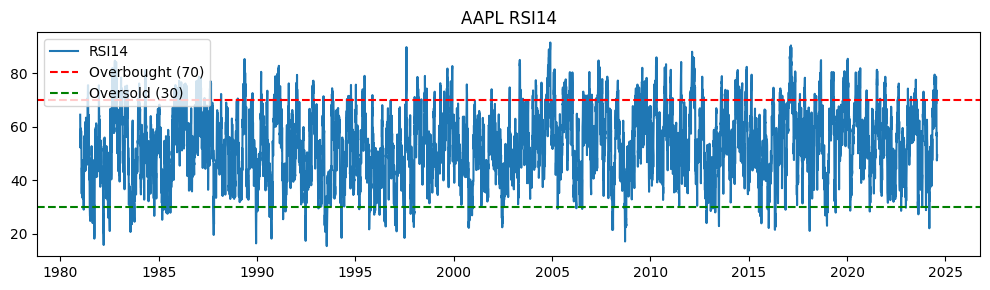

Saved plot: AMZN_rsi14.png


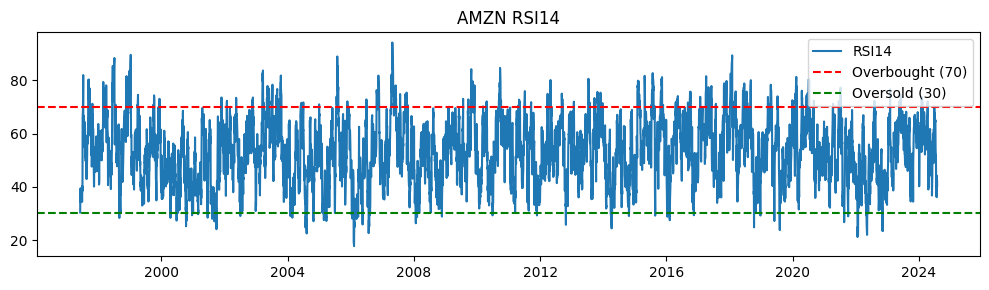

Saved plot: GOOG_rsi14.png


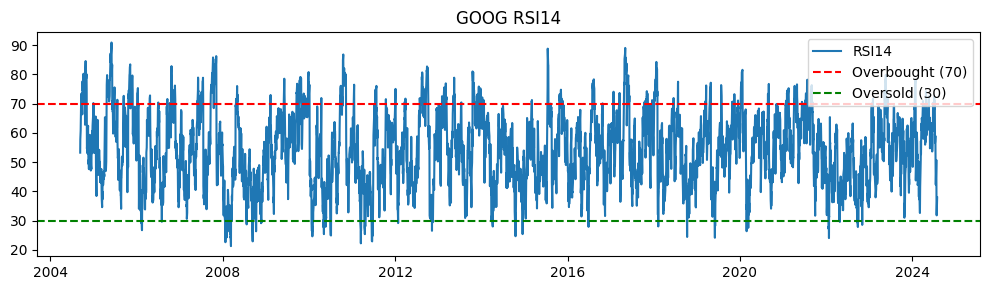

Saved plot: META_rsi14.png


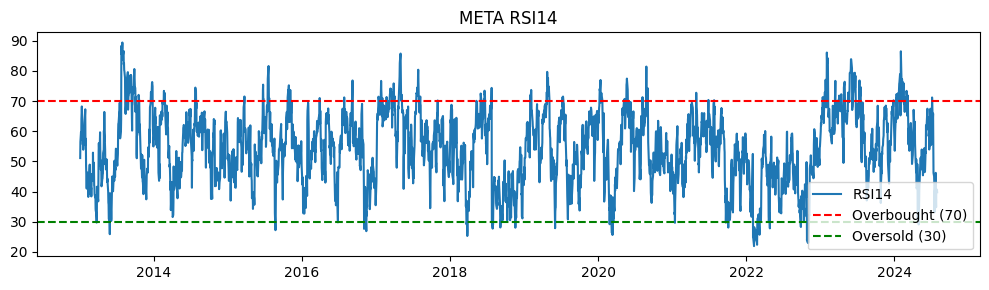

Saved plot: MSFT_rsi14.png


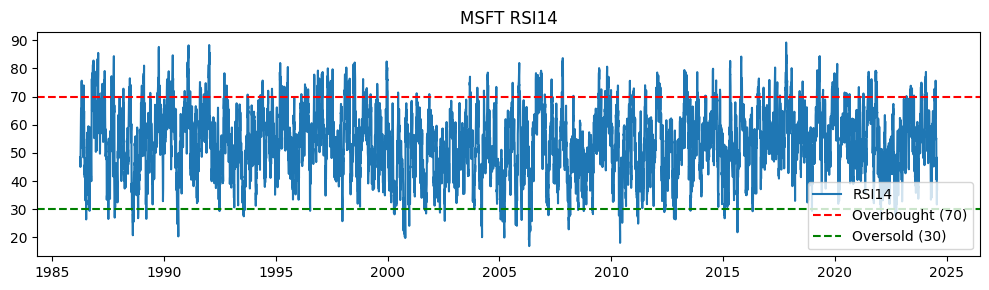

Saved plot: NVDA_rsi14.png


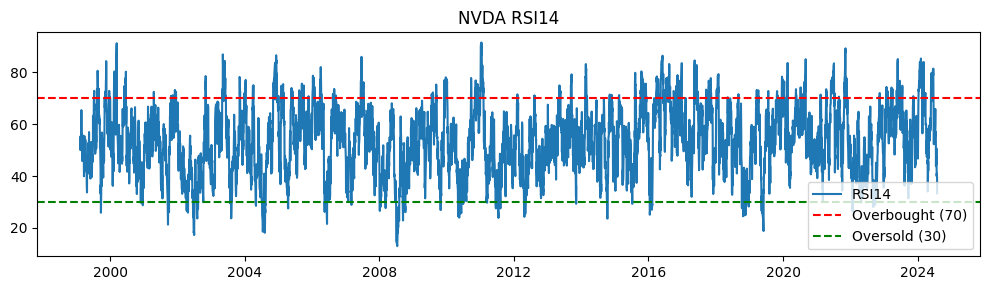

Saved plot: TSLA_rsi14.png


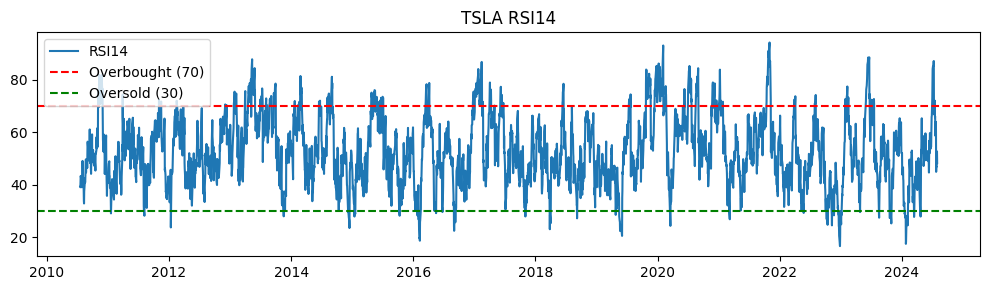

In [81]:
for ticker, df in dfs.items():
    if 'rsi14' in df.columns:
        plt.figure(figsize=(10, 3))
        plt.plot(df['rsi14'], label='RSI14')
        plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
        plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
        plt.title(f"{ticker} RSI14")
        plt.legend()
        plt.tight_layout()
        save_and_show_plot(f"{ticker}_rsi14.png")
    else:
        print(f"rsi14 not found in {ticker}")


Saved plot: AAPL_macd.png


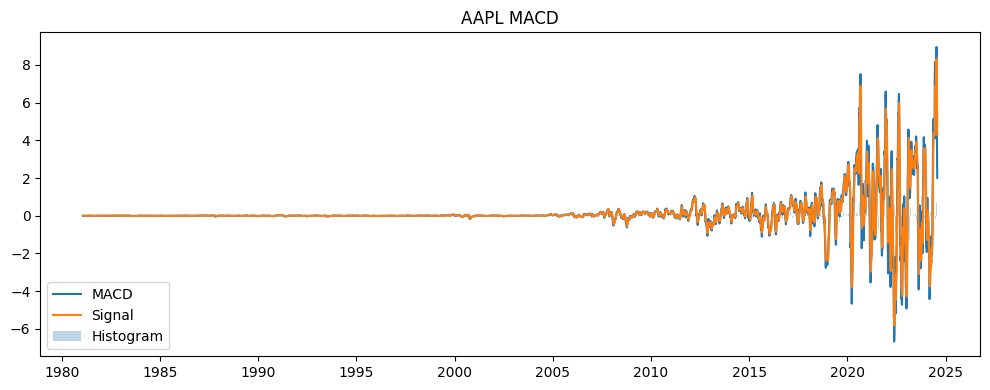

Saved plot: AMZN_macd.png


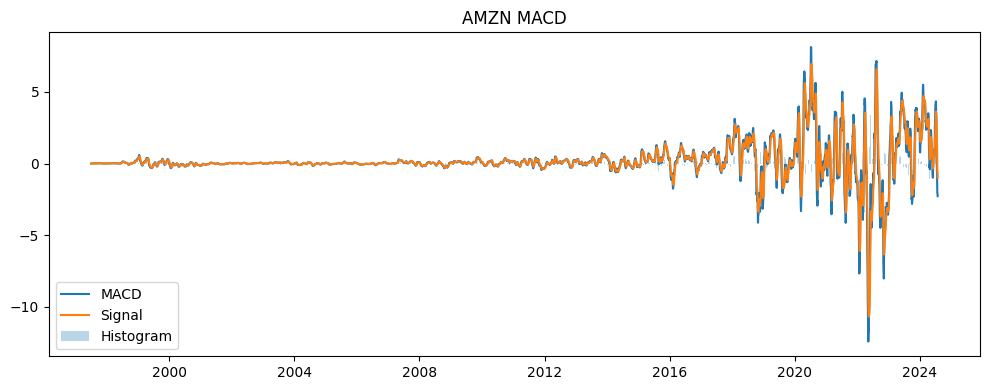

Saved plot: GOOG_macd.png


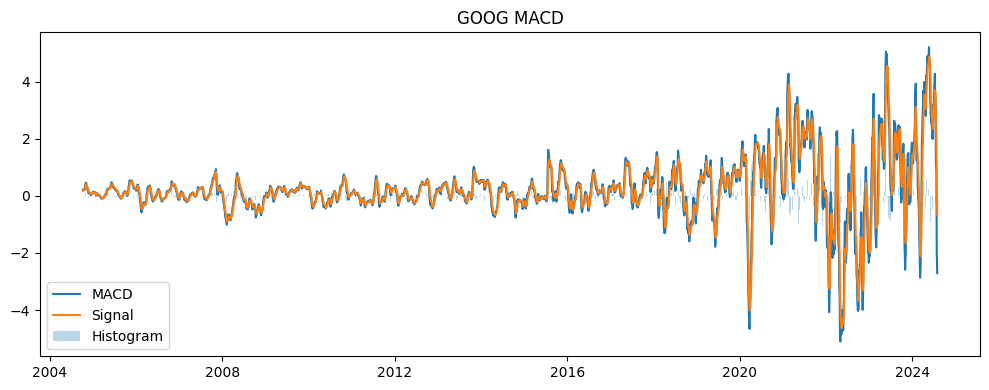

Saved plot: META_macd.png


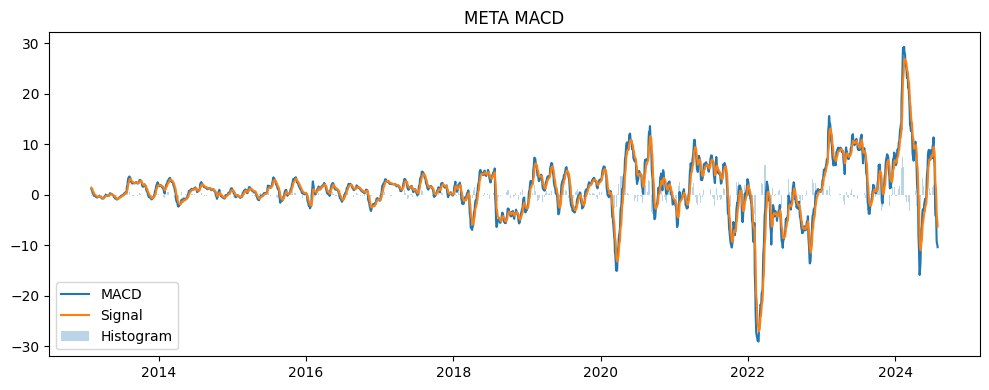

Saved plot: MSFT_macd.png


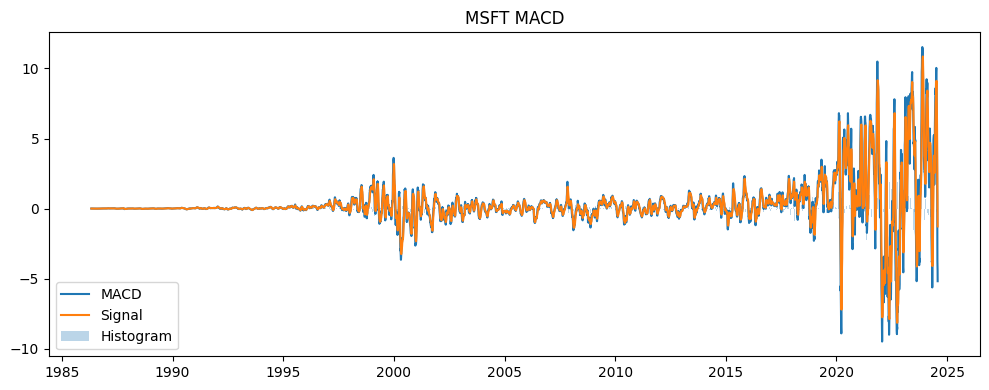

Saved plot: NVDA_macd.png


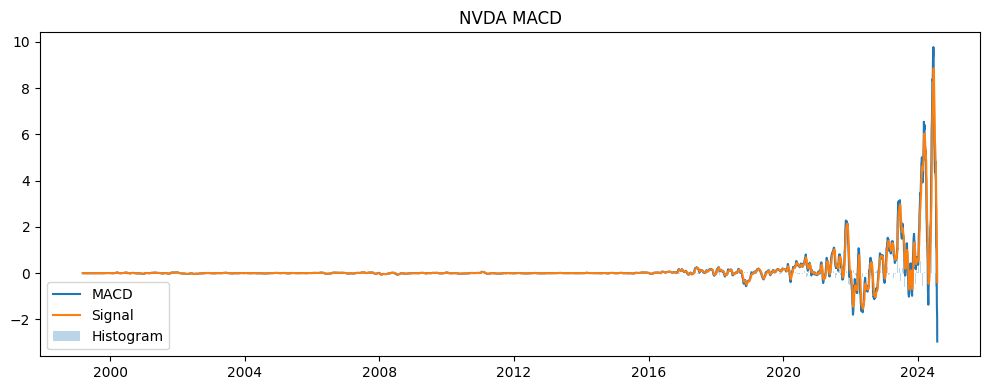

Saved plot: TSLA_macd.png


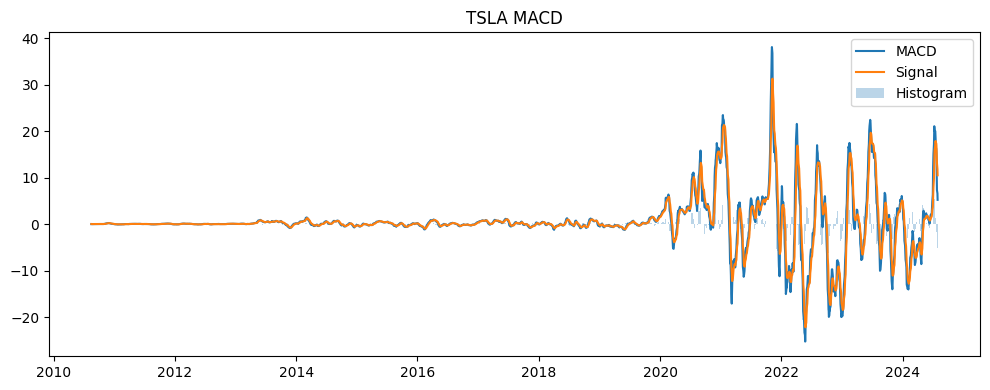

In [83]:
for ticker, df in dfs.items():
    if all(col in df.columns for col in ['macd', 'macd_signal', 'macd_hist']):
        plt.figure(figsize=(10, 4))
        plt.plot(df['macd'], label='MACD')
        plt.plot(df['macd_signal'], label='Signal')
        plt.bar(df.index, df['macd_hist'], label='Histogram', alpha=0.3)
        plt.title(f"{ticker} MACD")
        plt.legend()
        plt.tight_layout()
        save_and_show_plot(f"{ticker}_macd.png")
    else:
        print(f"MACD components missing for {ticker}")


Saved plot: AAPL_volatility.png


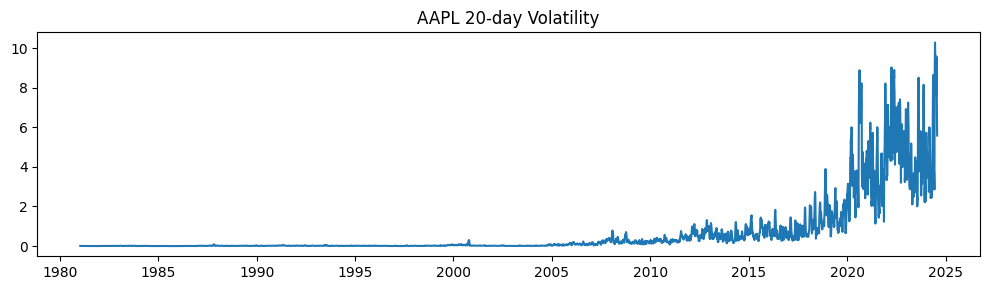

Saved plot: AMZN_volatility.png


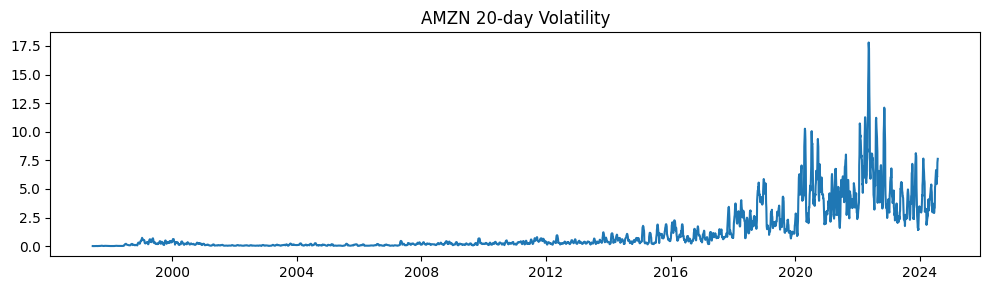

Saved plot: GOOG_volatility.png


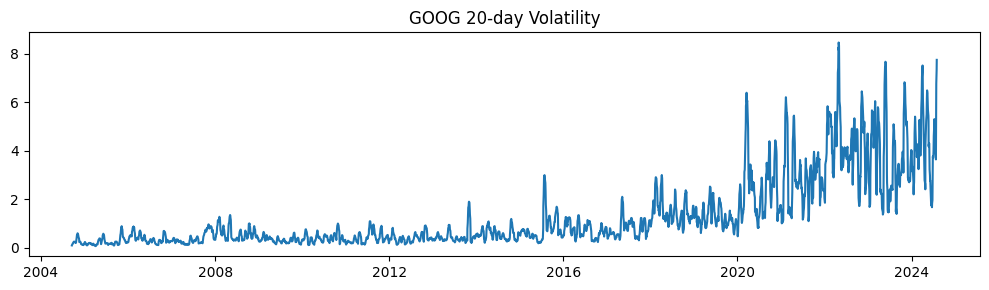

Saved plot: META_volatility.png


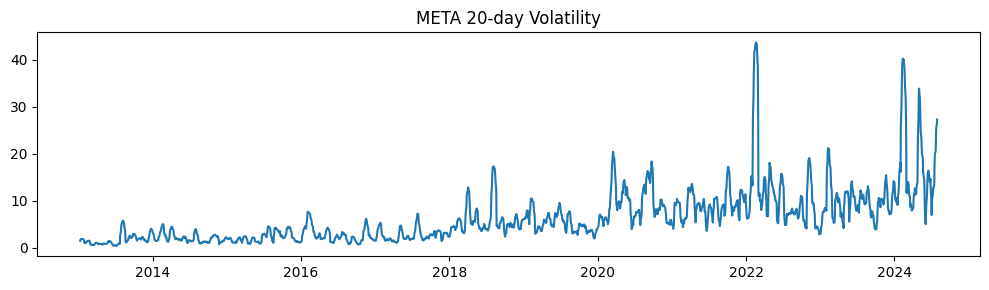

Saved plot: MSFT_volatility.png


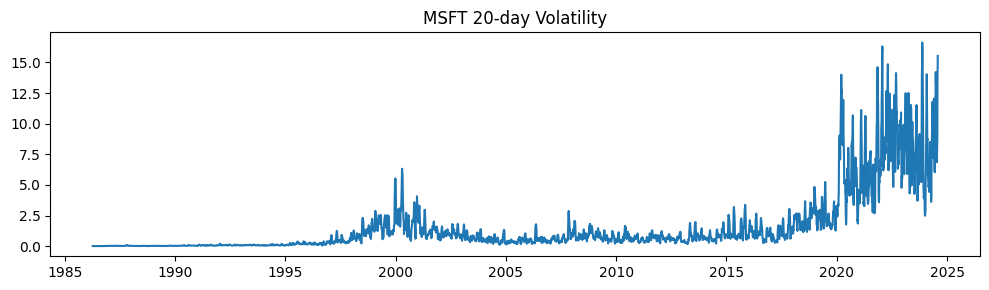

Saved plot: NVDA_volatility.png


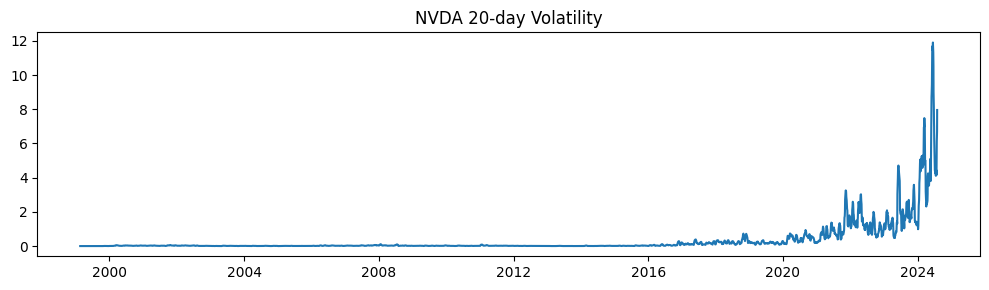

Saved plot: TSLA_volatility.png


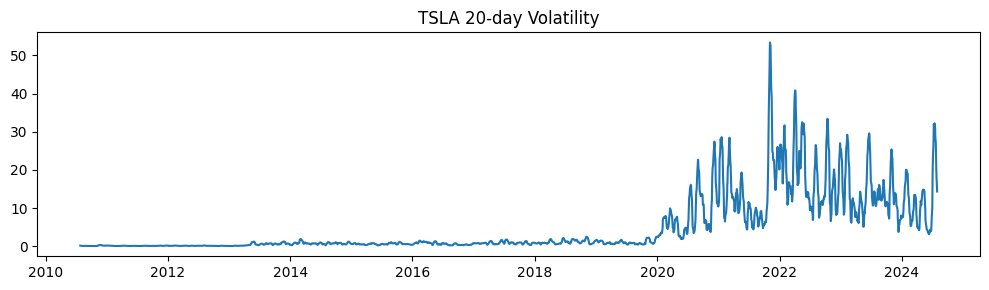

In [84]:
for ticker, df in dfs.items():
    if 'volatility20' in df.columns:
        plt.figure(figsize=(10, 3))
        plt.plot(df['volatility20'], label='Volatility 20')
        plt.title(f"{ticker} 20-day Volatility")
        plt.tight_layout()
        save_and_show_plot(f"{ticker}_volatility.png")
    else:
        print(f"volatility20 column missing for {ticker}")


Saved plot: AAPL_returns.png


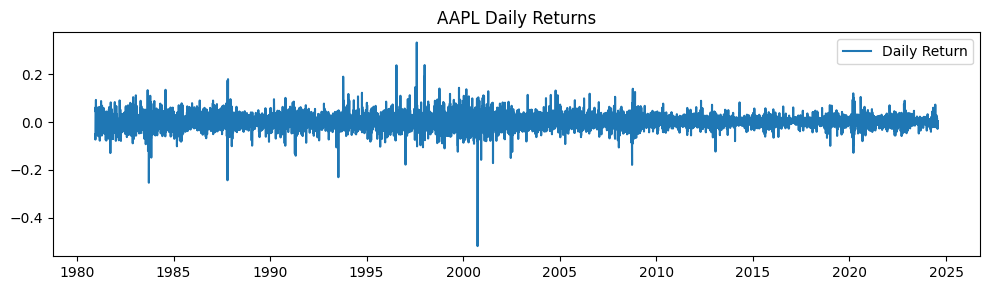

Saved plot: AMZN_returns.png


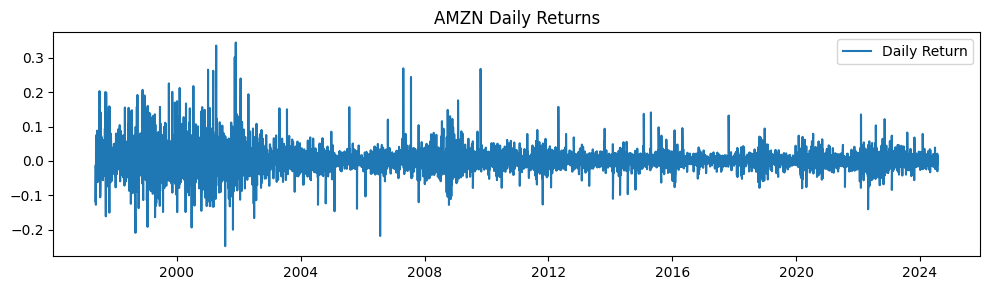

Saved plot: GOOG_returns.png


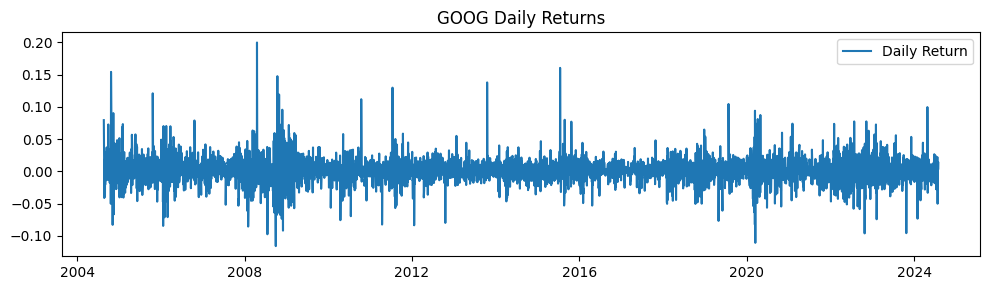

Saved plot: META_returns.png


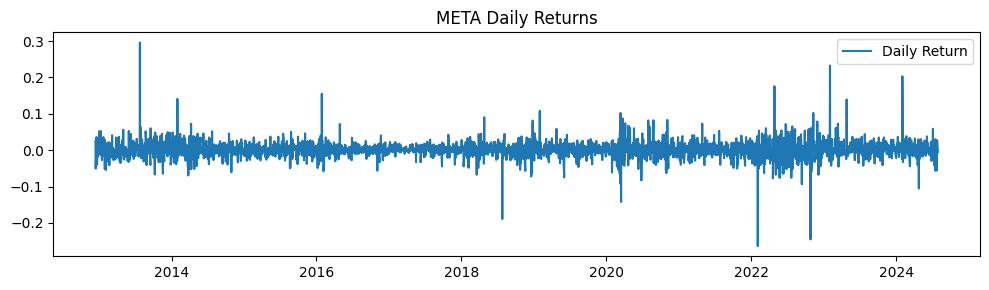

Saved plot: MSFT_returns.png


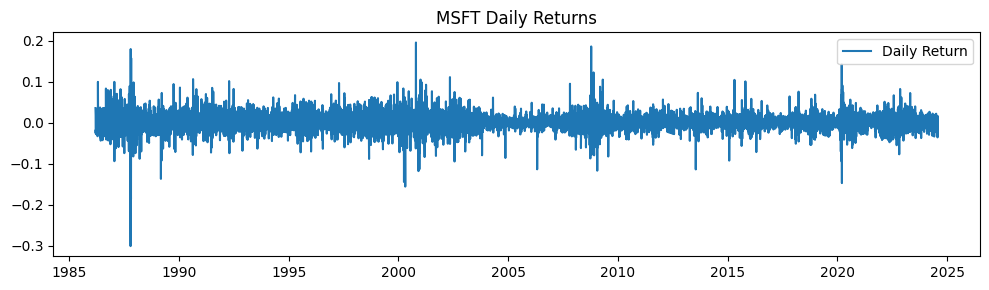

Saved plot: NVDA_returns.png


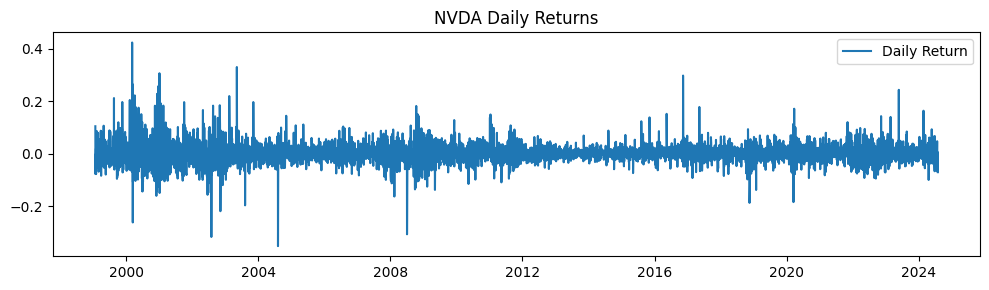

Saved plot: TSLA_returns.png


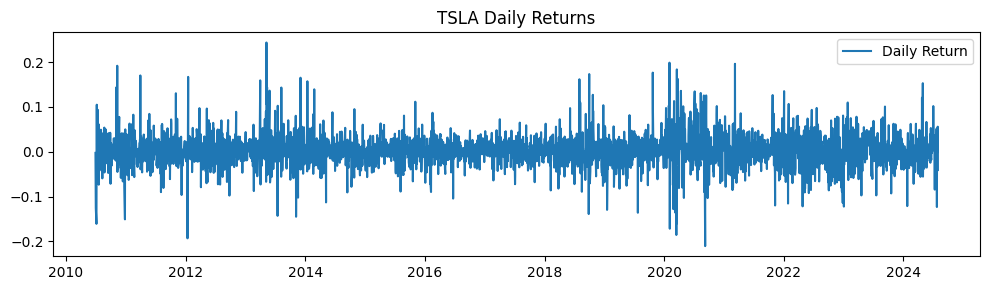

In [86]:
for ticker, df in dfs.items():
    if 'daily_return' in df.columns:
        plt.figure(figsize=(10, 3))
        plt.plot(df['daily_return'], label='Daily Return')
        plt.title(f"{ticker} Daily Returns")
        plt.legend()
        plt.tight_layout()
        save_and_show_plot(f"{ticker}_returns.png")
    else:
        print(f"daily_return not found for {ticker}")


Correlation matrix for AAPL:
                 sma20     rsi14      macd  daily_return
sma20         1.000000  0.063091  0.285633     -0.002560
rsi14         0.063091  1.000000  0.374162      0.319587
macd          0.285633  0.374162  1.000000      0.019667
daily_return -0.002560  0.319587  0.019667      1.000000
Saved plot: AAPL_indicator_correlations.png


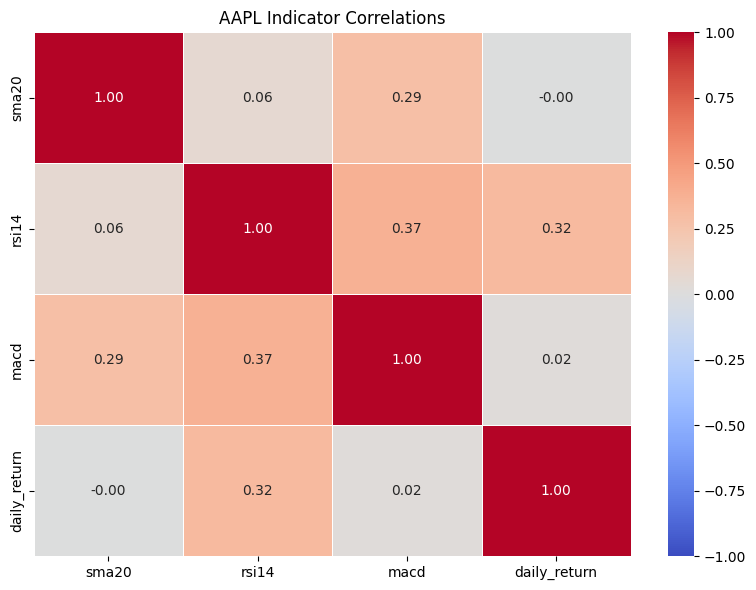

In [87]:
# Correlation analysis for the sample ticker
import seaborn as sns

# Select only existing indicators for correlation
target_cols = [col for col in ['sma20', 'rsi14', 'macd', 'daily_return'] if col in df_sample.columns]
if not target_cols:
    print(f"No indicator columns found for {sample_ticker}.")
else:
    df_corr = df_sample[target_cols].dropna()

    if df_corr.empty:
        print(f"No data available for correlation analysis for {sample_ticker}.")
    else:
        # Calculate correlation matrix
        corr_matrix = df_corr.corr()
        print(f"Correlation matrix for {sample_ticker}:")
        print(corr_matrix)

        # Create and save/show correlation heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
        plt.title(f"{sample_ticker} Indicator Correlations")
        save_and_show_plot(f"{sample_ticker}_indicator_correlations.png")